# Ensemble model

Example to show how to use to the EnsembleModelInference to compute
1. Feature importance intervals
2. Prediction intervals


In [1]:
#%%
import numpy as np
from sklearn.datasets import make_regression
from ml_uncertainty.model_inference.ensemble_model_inference import (
    EnsembleModelInference,
)
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

np.random.seed(1)


# Create a test case for elastic net regression and test the inference with
# the created class.
X_og, y_og = make_regression(
    n_samples=100,
    n_features=5,
    n_informative=2,
    noise=10,
    random_state=10,
)

X = X_og[:80, :]
y = y_og[:80]

X_test = X_og[80:, :]
y_test = y_og[80:]

regr = RandomForestRegressor(
    max_depth=10, random_state=0, max_samples=0.7, n_estimators=500
)

regr.fit(X, y)

# Getting predicted value.
y_pred = regr.predict(X)

# Getting predicted value for test set.
y_pred_test = regr.predict(X_test)


<Axes: title={'center': 'Feature importance with spreads'}, xlabel='mean'>

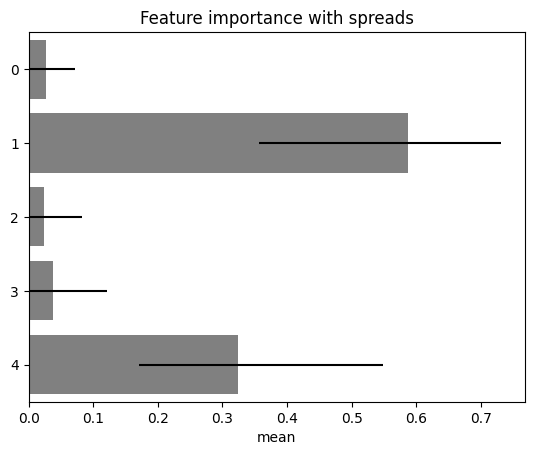

In [2]:
#%%
# Run ensemble model inference
inf = EnsembleModelInference()

inf.set_up_model_inference(X, y, regr)

# Get feature importances and their uncertainties for the first variable.
df_imp = inf.get_feature_importance_intervals(
    confidence_level=90.0,
)[0]

# Feature importance plots. Make plots.
plt.figure()
plt.title("Feature importance with spreads")
sns.barplot(
    x=df_imp["mean"],
    y=df_imp.index.astype("category"),
    xerr=(
        df_imp["mean"] - df_imp["lower_bound"],
        df_imp["upper_bound"] - df_imp["mean"],
    ),
    color="gray",
    capsize=10,
)


R2 = 0.958149846709675
R2 test = 0.8555940155021607


Text(0, 0.5, 'Predicted')

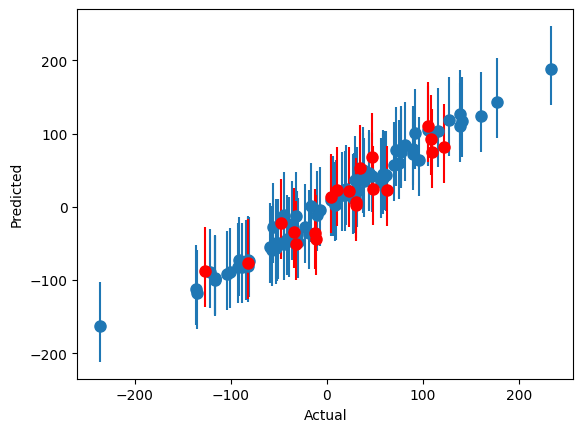

In [4]:
#%%
# Compute prediction intervals for the first target variable.
# NOTE: For confidence intervals, simply add type="confidence" as an argument
# to the get_intervals function.
df_int = inf.get_intervals(
    X,
    is_train_data=True,
    confidence_level=90.0,
)[0]

# Test set: Compute prediction intervals for the first target variable.
df_int_test = inf.get_intervals(
    X_test,
    is_train_data=False,
    confidence_level=90.0,
)[0]

print(f"R2 = {r2_score(y, y_pred)}")
print(f"R2 test = {r2_score(y_test, y_pred_test)}")


# With predicted error values.
plt.figure()
plt.errorbar(
    y,
    y_pred,
    yerr=(
        df_int["mean"] - df_int["lower_bound"],
        df_int["upper_bound"] - df_int["mean"],
    ),
    marker="o",
    markersize=8,
    ls="none",
    zorder=0,
)

# Test: With predicted error values.
plt.errorbar(
    y_test,
    y_pred_test,
    yerr=(
        df_int_test["mean"] - df_int_test["lower_bound"],
        df_int_test["upper_bound"] - df_int_test["mean"],
    ),
    marker="o",
    markersize=8,
    ls="none",
    zorder=0,
    color="red",
)
plt.xlabel("Actual")
plt.ylabel("Predicted")